In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

In [2]:
#data = pd.read_pickle('C:/Users/erikm/Desktop/Diplomarbeit Erik Marr/Daten/Finish/TPath_300_finish_data.pkl')
data = pd.read_pickle('C:/Users/erikm/Desktop/Diplomarbeit Erik Marr/Daten/Finish/Finish_D4_I7000_F5000/TPathI7000F5000_200_finish_data_D4.pkl')

data

,X-Koordinate,Y-Koordinate,Zeitpunkt,Strom,Kraft,Temperatur
0,0.0000,-0.00200,200,7000,5000,719.29
1,0.0000,-0.00192,200,7000,5000,799.34
2,0.0000,-0.00184,200,7000,5000,878.22
3,0.0000,-0.00176,200,7000,5000,956.54
4,0.0000,-0.00168,200,7000,5000,1033.50
...,...,...,...,...,...,...
1066,0.0024,0.00168,200,7000,5000,1059.30
1067,0.0024,0.00176,200,7000,5000,1037.80
1068,0.0024,0.00184,200,7000,5000,990.98
1069,0.0024,0.00192,200,7000,5000,967.77


In [3]:
df = data.drop(data.columns[2:5], axis=1)
df['Temperatur'].describe()

count    1071.000000
mean     1169.503576
std       208.894057
min       583.550000
25%      1050.500000
50%      1197.200000
75%      1345.500000
max      1444.600000
Name: Temperatur, dtype: float64

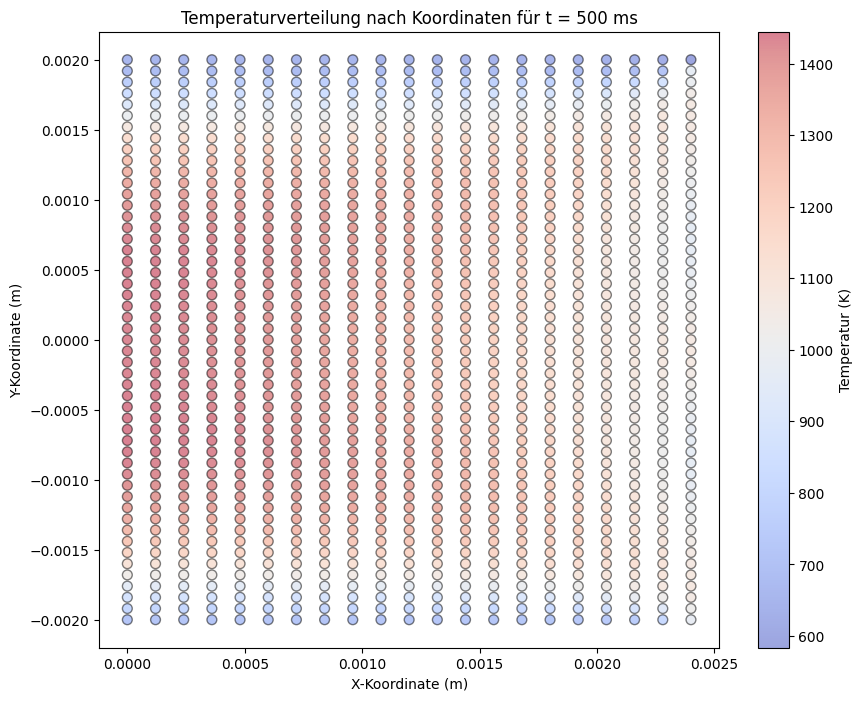

In [10]:
x = df['X-Koordinate']
y = df['Y-Koordinate']  # Y-Koordinaten
temperature = df['Temperatur']  # Temperaturwerte

# Erstellen des Plots
plt.figure(figsize=(10, 8))
sc = plt.scatter(x, y, c=temperature, cmap='coolwarm', edgecolor='k', alpha=0.5, s=50)
plt.colorbar(sc, label='Temperatur (K)')
plt.xlabel('X-Koordinate (m)')
plt.ylabel('Y-Koordinate (m)')
plt.title('Temperaturverteilung nach Koordinaten für t = 500 ms')
plt.grid(False)  # Gitterlinien ausblenden
plt.savefig('C:/Users/erikm/Desktop/Diplomarbeit Erik Marr/Bilder Diplomarbeit/Temperaturverteilung.png')
plt.show()

In [35]:
gefilterte_werte = df[(df['X-Koordinate'] >= 0.0015)]
df_werte = gefilterte_werte
print(gefilterte_werte)


       X-Koordinate  Y-Koordinate  Temperatur
15075        0.0015      -0.00200      661.90
15076        0.0015      -0.00198      675.98
15077        0.0015      -0.00196      690.12
15078        0.0015      -0.00194      704.10
15079        0.0015      -0.00192      717.92
...             ...           ...         ...
25321        0.0025       0.00192      584.84
25322        0.0025       0.00194      581.64
25323        0.0025       0.00196      578.47
25324        0.0025       0.00198      575.32
25325        0.0025       0.00200      572.20

[10251 rows x 3 columns]


In [20]:
df_werte = gefilterte_werte[(gefilterte_werte['Y-Koordinate'] >= 0.0015) & (gefilterte_werte['Y-Koordinate'] <= 0.002)]
print(df_werte)

       X-Koordinate  Y-Koordinate  Temperatur
15250        0.0015       0.00150      875.49
15251        0.0015       0.00152      862.47
15252        0.0015       0.00154      849.37
15253        0.0015       0.00156      836.06
15254        0.0015       0.00158      822.54
...             ...           ...         ...
25321        0.0025       0.00192      584.84
25322        0.0025       0.00194      581.64
25323        0.0025       0.00196      578.47
25324        0.0025       0.00198      575.32
25325        0.0025       0.00200      572.20

[1326 rows x 3 columns]


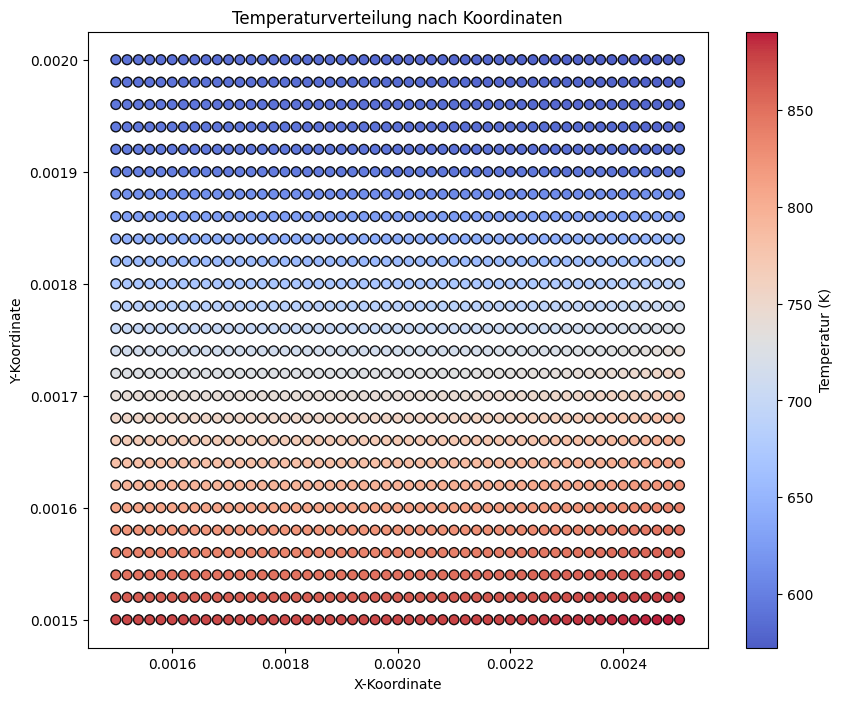

In [21]:
x = df_werte['X-Koordinate']
y = df_werte['Y-Koordinate']  # Y-Koordinaten
temperature = df_werte['Temperatur']  # Temperaturwerte

# Erstellen des Plots
plt.figure(figsize=(10, 8))
sc = plt.scatter(x, y, c=temperature, cmap='coolwarm', edgecolor='k', alpha=0.9, s= 50)
plt.colorbar(sc, label='Temperatur (K)')
plt.xlabel('X-Koordinate')
plt.ylabel('Y-Koordinate')
plt.title('Temperaturverteilung nach Koordinaten')
plt.grid(False)  # Gitterlinien ausblenden

plt.show()

In [18]:
df_werte1 = df_werte[df_werte['Y-Koordinate']> 0.0018]
print(df_werte[df_werte['Y-Koordinate'] == 0.0018])

       X-Koordinate  Y-Koordinate  Temperatur
25315        0.0025        0.0018      691.47


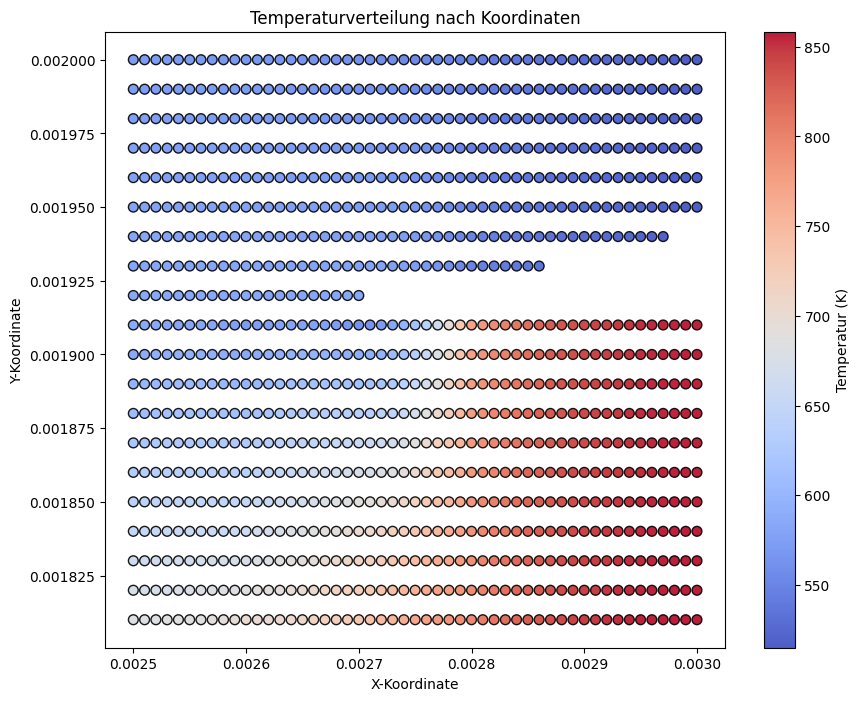

In [9]:
x = df_werte1['X-Koordinate']
y = df_werte1['Y-Koordinate']  # Y-Koordinaten
temperature = df_werte1['Temperatur']  # Temperaturwerte

# Erstellen des Plots
plt.figure(figsize=(10, 8))
sc = plt.scatter(x, y, c=temperature, cmap='coolwarm', edgecolor='k', alpha=0.9, s= 50)
plt.colorbar(sc, label='Temperatur (K)')
plt.xlabel('X-Koordinate')
plt.ylabel('Y-Koordinate')
plt.title('Temperaturverteilung nach Koordinaten')
plt.grid(False)  # Gitterlinien ausblenden

plt.show()

In [89]:
a1 = df_werte1[df_werte1['Y-Koordinate'] == 0.00200]
print(df_werte1[df_werte1['Y-Koordinate'] == 0.00200])

      X-Koordinate  Y-Koordinate  Temperatur
6463       0.00252         0.002      363.04
6564       0.00256         0.002      360.16
6665       0.00260         0.002      357.59
6766       0.00264         0.002      355.28
6867       0.00268         0.002      353.18
6967       0.00272         0.002      351.28
7067       0.00276         0.002      349.54
7167       0.00280         0.002      347.94
7267       0.00284         0.002      346.48
7367       0.00288         0.002      345.13
7467       0.00292         0.002      343.89
7567       0.00296         0.002      342.75
7667       0.00300         0.002      341.71


In [90]:
a2 = df_werte1[df_werte1['Y-Koordinate'] == 0.00196]
print(df_werte1[df_werte1['Y-Koordinate'] == 0.00196])


      X-Koordinate  Y-Koordinate  Temperatur
6462       0.00252       0.00196      364.22
6563       0.00256       0.00196      360.99
6664       0.00260       0.00196      358.23
6765       0.00264       0.00196      355.78
6866       0.00268       0.00196      353.58
6966       0.00272       0.00196      351.61
7066       0.00276       0.00196      349.82
7166       0.00280       0.00196      348.19
7266       0.00284       0.00196      346.69
7366       0.00288       0.00196      345.32
7466       0.00292       0.00196      344.09
7566       0.00296       0.00196      342.97
7666       0.00300       0.00196      341.96


In [91]:
a = a1['Temperatur'].iloc[0] - a2['Temperatur'].iloc[0]
print(a)


-1.1800000000000068


Test für Git